In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#   패키지 설치
#   pip install sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 모델 학습
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 성능 조절
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

# 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import silhouette_score

# 경고 메세지 숨김
import warnings     
warnings.filterwarnings('ignore')

# 테이블 열기

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
# 특성
wine_data = wine.iloc[:, 0:3]

# 타겟
wine_target = wine.iloc[:, 3]

In [4]:
wine_data.head()

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51


In [5]:
wine_target.value_counts()
# 1: 화이트, 0: 레드

1.0    4898
0.0    1599
Name: class, dtype: int64

# 데이터 분할

In [6]:
data = wine_data       # 특성
target = wine_target     # 타겟

xtrain, xtest, ytrain, ytest = train_test_split(
 
    data, target             # x: 특성, y: 타겟
    , test_size = 0.2       # 테스트 데이터 비율(0~1)
#   , stratify = target      # 계층화(훈련＆테스트 데이터 비율: x=y)
    , random_state = 42   # 랜덤 시드
    )

print(xtrain.shape, xtest.shape)

(5197, 3) (1300, 3)


# 랜덤 포레스트1

In [7]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

# 교차 검증(훈련 + 검증)

In [8]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    rfc
    , xtrain, ytrain    # 특성, 타겟
    , scoring='accuracy'    # 평가 지표(분류/회귀)
    , return_train_score=True    # 훈련 데이터 정확도 추가
    , cv=5   # 분할 종류(회귀: KFold, 분류: StratifiedKFold)
    , n_jobs=-1    # 사용할 CPU 코어 개수(-1: 모두, 1: 한 개)
    )

scores # 모델 학습 시간, 모델 검증 시간, 검증 점수

{'fit_time': array([0.53541732, 0.348037  , 0.37665176, 0.35055542, 0.34880209]),
 'score_time': array([0.03479409, 0.03374362, 0.03489065, 0.03352308, 0.03354859]),
 'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]),
 'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}

In [9]:
np.mean(scores['train_score'])

0.9973541965122431

In [10]:
np.mean(scores['test_score'])

0.8905151032797809

# 모델 학습

In [11]:
rfc.fit(xtrain, ytrain)

rfc.feature_importances_

array([0.23167441, 0.50039841, 0.26792718])

# 랜덤 포레스트2

In [12]:
rfc = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rfc.fit(xtrain, ytrain)

rfc.oob_score_    # 검증 데이터 정확도

0.8934000384837406

In [ ]:
rfc.score( xtrain, ytrain )            # 훈련 데이터 정확도

0.996921300750433

### 시각화 - 특성 중요도

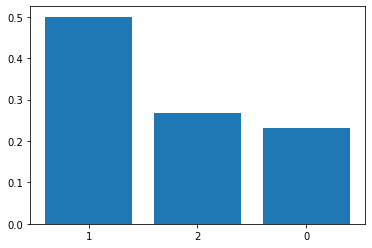

In [25]:
# 코드 생각
importance = rfc.feature_importances_     # 특성 중요도

# rfc.feature_importances_ # 특성 중요도 이름
descending = np.argsort(importance)[::-1]   # 내림차순
names = []

for i in descending:
    names.append(i)
    
# 시각화 - 막대그래프
plt.bar(range(3), importance[descending])
plt.xticks(range(3), names)
plt.show()

# 엑스트라 트리

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=100)

### 교차 검증

In [ ]:
scores = cross_validate(etc, xtrain, ytrain, return_train_score=True, n_jobs=-1)

scores

In [ ]:
np.mean(scores['train_score'])

In [ ]:
np.mean(scores['test_score'])

# 모델 학습

In [ ]:
etc.fit(xtrain, ytrain)

etc.feature_importances_    # 특성 중요도

# 그레이디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators = 500    # 결정 트리 갯수(100)
    , learning_rate = 0.2    # 학습률(0.1)
    , random_state = 42
    )

### 교차 검증

In [ ]:
scores = cross_validate(
    gbc
    , xtrain, ytrain               # 특성, 타겟
#   , xtrain_scaled, ytrain        # 특성(스케일링), 타겟
    , scoring = 'accuracy'      # 평가 지표(분류/회귀)
    , return_train_score = True    # 훈련 데이터 정확도 추가
    , cv = 5   # 분할 종류??(회귀: KFold, 분류: StratifiedKFold)
    , n_jobs = -1    # 사용할 CPU 개수(-1: 모두, 1: 한 개)
    )

scores    # 모델 학습 시간, 모델 검증 시간, (훈련 데이터 정확도), 검증 데이터 정확도

In [ ]:
np.mean(scores['train_score'])    # 훈련 데이터 정확도

In [ ]:
np.mean(scores['test_score'])     # 검증 데이터 정확도

# 모델 학습

In [ ]:
gbc.fit(xtrain, ytrain)

gbc.feature_importances_    # 특성 중요도

In [ ]:
gbc.score( xtrain, ytrain )            # 훈련 데이터 정확도

In [ ]:
gbc.score( xtest, ytest )              # 테스트 데이터 정확도

# 히스토그램 기반 그레이디언트 부스팅

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(
    max_iter=100    # 하이퍼 파라미터(부스팅 반복 횟수)
    , learning_rate = 0.1    # 학습률
    , max_bins = 255    # 입력 데이터 나눌 구간
    )

### 교차 검증

In [ ]:
scores = cross_validate(
    hgbc
    , xtrain, ytrain               # 특성, 타겟
#   , xtrain_scaled, ytrain        # 특성(스케일링), 타겟
    , scoring = 'accuracy'      # 평가 지표(분류/회귀)
    , return_train_score = True    # 훈련 데이터 정확도 추가
    , cv = 5   # 분할 종류??(회귀: KFold, 분류: StratifiedKFold)
    , n_jobs = -1    # 사용할 CPU 개수(-1: 모두, 1: 한 개)
    )

scores    # 모델 학습 시간, 모델 검증 시간, (훈련 데이터 정확도), 검증 데이터 정확도

In [ ]:
np.mean(scores['train_score'])    # 훈련 데이터 정확도

In [ ]:
np.mean(scores['test_score'])     # 검증 데이터 정확도

# 모델 학습

In [ ]:
hgbc.fit(xtrain, ytrain)

from sklearn.inspection import permutation_importance
result = permutation_importance(
    hgbc
    , xtrain, ytrain
    , n_repeats=10    # 랜덤하게 섞을 횟수(5)
    , n_jobs=-1
    , random_state=42
    )

result.importances_mean    # 특성 중요도
# result.importances_mean    # 평균
# result.importances_std    # 표준 편차

In [ ]:
hgbc.score(xtrain, ytrain)    # 훈련 데이터 정확도

In [ ]:
hgbc.score(xtest, ytest)    # 테스트 데이터 정확도